# **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix

## **Dataset**

In [2]:

#Putting the csv file
file_link = 'https://drive.google.com/file/d/1wW3sOKv7oKTvplaXldfefCy4d4X70t3n/view?usp=sharing'

id = file_link.split("/")[-2]
print(id)


new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)  #reading the csv file


#df.head()

1wW3sOKv7oKTvplaXldfefCy4d4X70t3n


In [3]:
df.shape  #checking size of dataset

(41487, 41)

In [4]:
df.describe(include = 'all')

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
count,41487,41487,41487.000000,41487.000000,41487,4.148700e+04,41487,41487.000000,41487.000000,41487,...,41487.000000,41487.000000,41487.000000,41487.000000,41487,41487,41487,41487,41487,41487.000000
unique,185,220,NaN,NaN,183,NaN,6191,NaN,NaN,53,...,NaN,NaN,NaN,NaN,337,369,1441,1441,8,NaN
top,Bulgaria,Beirut,NaN,NaN,Europe/Rome,NaN,2023-09-14 16:30,NaN,NaN,Partly cloudy,...,NaN,NaN,NaN,NaN,06:11 AM,06:02 PM,No moonrise,No moonset,Waning Gibbous,NaN
freq,570,214,NaN,NaN,639,NaN,47,NaN,NaN,16122,...,NaN,NaN,NaN,NaN,493,464,1493,1364,9940,NaN
mean,NaN,NaN,19.297453,21.762549,NaN,1.702731e+09,NaN,19.275238,66.695360,NaN,...,25.136780,45.406983,1.610167,2.445224,NaN,NaN,NaN,NaN,NaN,52.695953
std,NaN,NaN,24.519376,65.686270,NaN,5.507579e+06,NaN,10.684254,19.231823,NaN,...,63.711326,106.069089,1.063525,2.669376,NaN,NaN,NaN,NaN,NaN,35.105546
min,NaN,NaN,-41.300000,-175.200000,NaN,1.693301e+09,NaN,-41.900000,-43.400000,NaN,...,0.500000,0.500000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,3.750000,-6.840000,NaN,1.697834e+09,NaN,12.000000,53.600000,NaN,...,2.500000,4.600000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,18.000000
50%,NaN,NaN,17.250000,23.240000,NaN,1.702926e+09,NaN,22.000000,71.600000,NaN,...,7.500000,12.800000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,54.000000
75%,NaN,NaN,41.320000,49.880000,NaN,1.707501e+09,NaN,27.000000,80.600000,NaN,...,22.900000,39.600000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,88.000000


In [5]:
df.isnull().sum() #checking for number of null values in each column

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [6]:
df.nunique()  #checking for number of unique values in each column

country                          185
location_name                    220
latitude                         216
longitude                        217
timezone                         183
last_updated_epoch               307
last_updated                    6191
temperature_celsius              628
temperature_fahrenheit          1012
condition_text                    53
wind_mph                         142
wind_kph                         142
wind_degree                      360
wind_direction                    16
pressure_mb                       98
pressure_in                      217
precip_mm                        438
precip_in                         55
humidity                          98
cloud                            101
feels_like_celsius               881
feels_like_fahrenheit           1443
visibility_km                     68
visibility_miles                  13
uv_index                          13
gust_mph                         486
gust_kph                         742
a

In [7]:
df.dtypes #checking for data type of each column

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


In [8]:
df['last_updated'] = pd.to_datetime(df['last_updated']) #converting values of date column to datetime data type

In [9]:
df['last_updated'].dt.to_period('M').value_counts().sort_index()  #checking to see how many months worth of data is available

last_updated
2023-08     632
2023-09    5858
2023-10    5928
2023-11    5273
2023-12    5660
2024-01    6053
2024-02    5662
2024-03    6042
2024-04     379
Freq: M, Name: count, dtype: int64

In [10]:
#checking for categorical and numeric values
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['country', 'location_name', 'timezone', 'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase']
Numerical Variables:
['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius', 'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination']


In [11]:
df_copy = df.copy() #copy dataset
df_copy = df_copy.drop(columns=cat_cols)  #Dropping all categorical valued columns
df_copy = df_copy.drop(columns=['latitude', 'longitude', 'temperature_fahrenheit', 'wind_mph', 'pressure_in', 'precip_in', 'feels_like_fahrenheit', 'visibility_miles', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination' ])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41487 entries, 0 to 41486
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   last_updated_epoch   41487 non-null  int64         
 1   last_updated         41487 non-null  datetime64[ns]
 2   temperature_celsius  41487 non-null  float64       
 3   wind_kph             41487 non-null  float64       
 4   wind_degree          41487 non-null  int64         
 5   pressure_mb          41487 non-null  float64       
 6   precip_mm            41487 non-null  float64       
 7   humidity             41487 non-null  int64         
 8   cloud                41487 non-null  int64         
 9   feels_like_celsius   41487 non-null  float64       
 10  visibility_km        41487 non-null  float64       
 11  uv_index             41487 non-null  float64       
 12  gust_kph             41487 non-null  float64       
 13  air_quality_PM2.5    41487 non-

In [12]:
df_copy['target'] = df_copy.shift(-1)['temperature_celsius']  #creating target column and pulling next day's temp as target temp
df_copy = df_copy.fillna(method='ffill')

In [13]:
df_copy

,last_updated_epoch,last_updated,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_PM2.5,air_quality_PM10,target
0,1693301400,2023-08-29 14:00:00,28.8,11.5,74,1004.0,0.00,19,0,26.7,10.0,7.0,13.3,7.9,11.1,27.0
1,1693301400,2023-08-29 11:30:00,27.0,6.1,210,1006.0,0.00,54,75,28.0,10.0,6.0,11.9,28.2,29.6,28.0
2,1693301400,2023-08-29 10:30:00,28.0,13.0,240,1014.0,0.00,30,25,27.4,10.0,7.0,5.4,6.4,7.9,10.2
3,1693301400,2023-08-29 11:30:00,10.2,9.7,345,1015.0,0.00,51,6,8.9,10.0,4.0,11.9,0.5,0.8,25.0
4,1693301400,2023-08-29 10:30:00,25.0,3.6,270,1016.0,0.00,69,75,26.9,10.0,6.0,5.8,139.6,203.3,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41482,1712074500,2024-04-02 12:15:00,28.0,6.8,110,1015.0,0.78,94,50,31.1,10.0,5.0,14.0,1.7,2.4,25.0
41483,1712074500,2024-04-02 23:15:00,25.0,11.2,80,1004.0,0.00,94,75,27.0,8.0,1.0,32.7,57.9,76.1,18.0
41484,1712074500,2024-04-02 19:15:00,18.0,6.5,185,1014.0,0.13,61,70,18.0,10.0,1.0,8.5,4.3,8.4,25.4
41485,1712074500,2024-04-02 18:15:00,25.4,8.6,119,1011.0,0.00,46,28,26.0,10.0,8.0,15.2,9.2,16.7,22.5


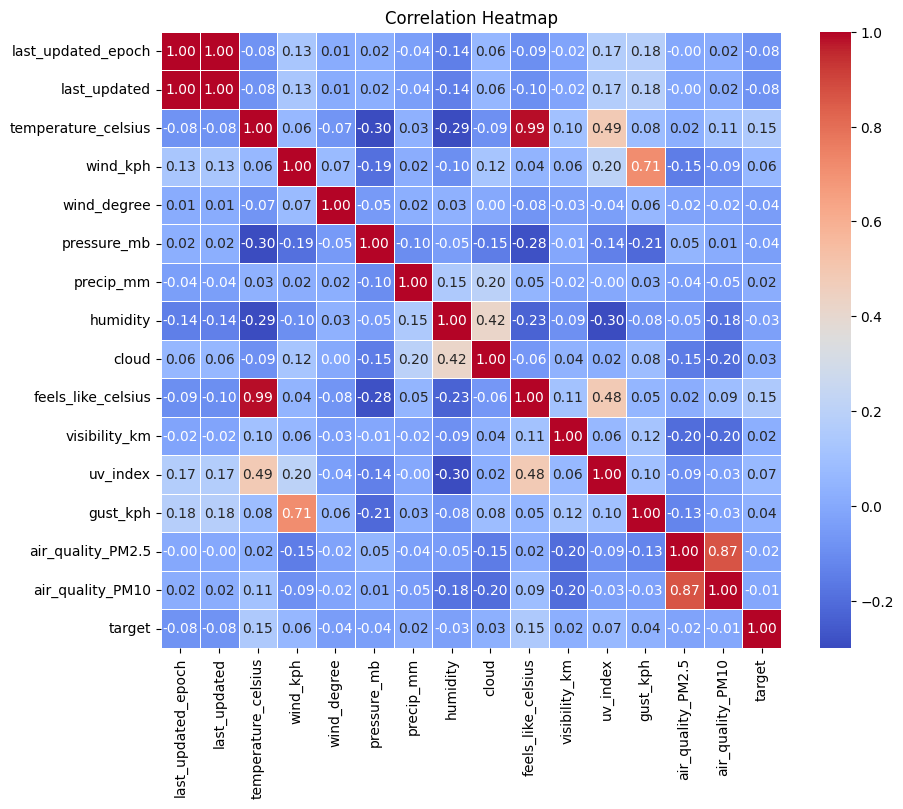

In [14]:
correlation_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Models and Training**

In [15]:
predictors = df_copy.columns[~df_copy.columns.isin(['target', 'last_updated_epoch', 'last_updated'])] #creating list of predictors

In [16]:
predictors

Index(['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb',
       'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km',
       'uv_index', 'gust_kph', 'air_quality_PM2.5', 'air_quality_PM10'],
      dtype='object')

In [17]:
X = df_copy[predictors]
y = df_copy['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 151.36757978193418


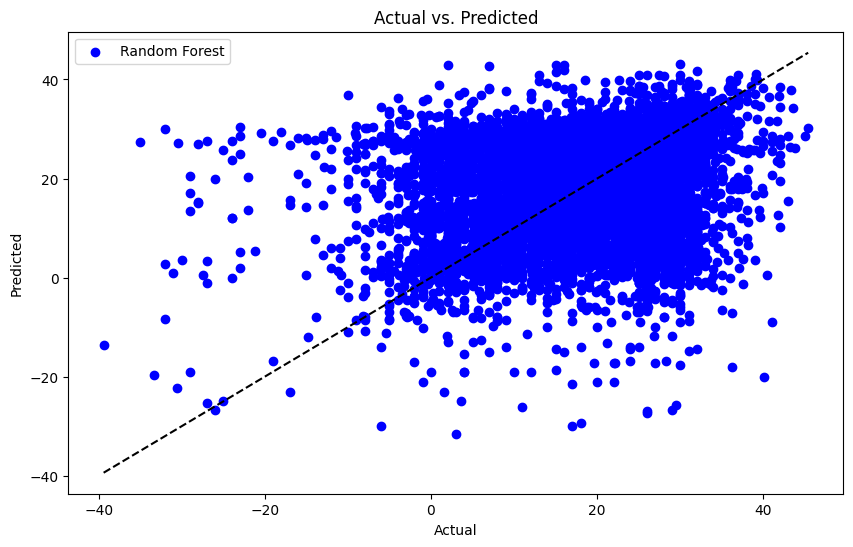

In [19]:
# Create and train the Random Forest regression model
rf = RandomForestRegressor(n_estimators= 500, random_state=42, max_depth= 100, bootstrap= False, max_features= 100)  # Adjust the number of estimators as needed
rf.fit(X_train, y_train)

# Evaluate the model's performance
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:', mse_rf)

# Actual vs. Predicted Plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [ ]:
rf = RandomForestRegressor(n_estimators= 3000, random_state=150, max_depth= 500, bootstrap= True, min_samples_split = 2, max_features =30 )  # Adjust the number of estimators as needed
rf.fit(X_train, y_train)

# Evaluate the model's performance
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:', mse_rf)

# Actual vs. Predicted Plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [ ]:
rf = RandomForestRegressor(n_estimators= 500, random_state=42, max_depth= 100, bootstrap= False, max_features= 100)  # Adjust the number of estimators as needed
rf.fit(X_train, y_train)

# Evaluate the model's performance
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:', mse_rf)

# Actual vs. Predicted Plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [ ]:
# Create and train the SVR model
svr = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', 'sigmoid', etc.
svr.fit(X_train, y_train)

# Evaluate the model's performance
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print('Mean Squared Error:', mse_svr)

# Actual vs. Predicted Plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='red', label='SVR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [ ]:


# Calculate baseline MSE using the mean or median of the target variable
baseline_pred = np.full_like(y_test, y_train.mean())  # Replace `y_train.mean()` with `y_train.median()` if using median
baseline_mse = mean_squared_error(y_test, baseline_pred)

print('Baseline MSE:', baseline_mse)
print('Random Forest MSE:', mse_rf)  # Replace `mse_rf` with the actual MSE value from the Random Forest model
print('SVR MSE:', mse_svr)  # Replace `mse_svr` with the actual MSE value from the SVR model

# Calculate the variance or standard deviation of the target variable
target_var = np.var(y)
target_std = np.std(y)

print('Target Variable Variance:', target_var)
print('Target Variable Standard Deviation:', target_std)

In [ ]:
# Initializing and training the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = linear_regression.predict(X_test)

# Evaluating the model's performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Mean Squared Error:', mse_lr)



# Actual vs. Predicted Plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='orange', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, and y_test are defined

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = linear_regression.predict(X_test)

# Evaluating the model's performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Linear Regression Mean Squared Error:', mse_lr)

# Lasso Regression
lasso_regression = Lasso(alpha=0.01)
lasso_regression.fit(X_train, y_train)
y_pred_lasso = lasso_regression.predict(X_test)

# Evaluating the model's performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('Lasso Regression Mean Squared Error:', mse_lasso)

# Ridge Regression
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train, y_train)
y_pred_ridge = ridge_regression.predict(X_test)

# Evaluating the model's performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Ridge Regression Mean Squared Error:', mse_ridge)

# ElasticNet Regression
elastic_regression = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_regression.fit(X_train, y_train)
y_pred_elastic = elastic_regression.predict(X_test)

# Evaluating the model's performance
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print('ElasticNet Regression Mean Squared Error:', mse_elastic)

# Actual vs. Predicted Plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='orange', label='Linear Regression')
plt.scatter(y_test, y_pred_lasso, color='blue', label='Lasso Regression')
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.scatter(y_test, y_pred_elastic, color='red', label='ElasticNet Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


In [ ]:
# Initializing and training the Gradient Boosting model
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluating the model's performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
print('Mean Squared Error:', mse_gb)

# Actual vs. Predicted Plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='green', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()